# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

**Sumber dataset :** Kaggle

**URL :**https://www.kaggle.com/datasets/nezukokamaado/auto-loan-dataset

**Ketentuan :**


*   Dataset tidak memiliki label atau kelas
*   Jumlah Baris 38576
*   Terdiri drai kolom Kategorikal dan Numerikal



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

**Kesimpulan :** Pada tahap import library bagian cluster, kita import KMeans dan DBSCAN. Apabila model KMeans tidak efektif maka kita akan gunakan model DBSCAN

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
#Memuat dataset
df = pd.read_csv('https://raw.githubusercontent.com/debswell/clustering-clasiffication-credit-risk/refs/heads/main/financial_loan.csv')
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

**Kesimpulan :** Pada info dataset diatas terdapat beberapa kolom yang harus diperbaiki seperti, kolom date yang harusnya bertipe date bukan object, dan terdapat juga data yang hilang pada kolom emp_title. Untuk mengatasi missing values pada kolom emp_title akan kita perbaiki pada tahap data preprocessing

In [ ]:
#Memeriksa Missing Values
print("Nilai kosong :",df.isnull().sum())

Nilai kosong : id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64


In [ ]:
#Menampilkan Kolom pada dataset
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

**Kesimpulan :** Pada kolom dataset, terdapat beberapa kolom yang akan kita hapus pada tahap data preprocessing karena tidak efektif untuk kita analisis seperti id,application_type,member id.

In [ ]:
#Memeriksa apakah ada nilai duplikat pada data
print("Jumlah duplikat data : ",df.duplicated().sum())

Jumlah duplikat data :  0


In [ ]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


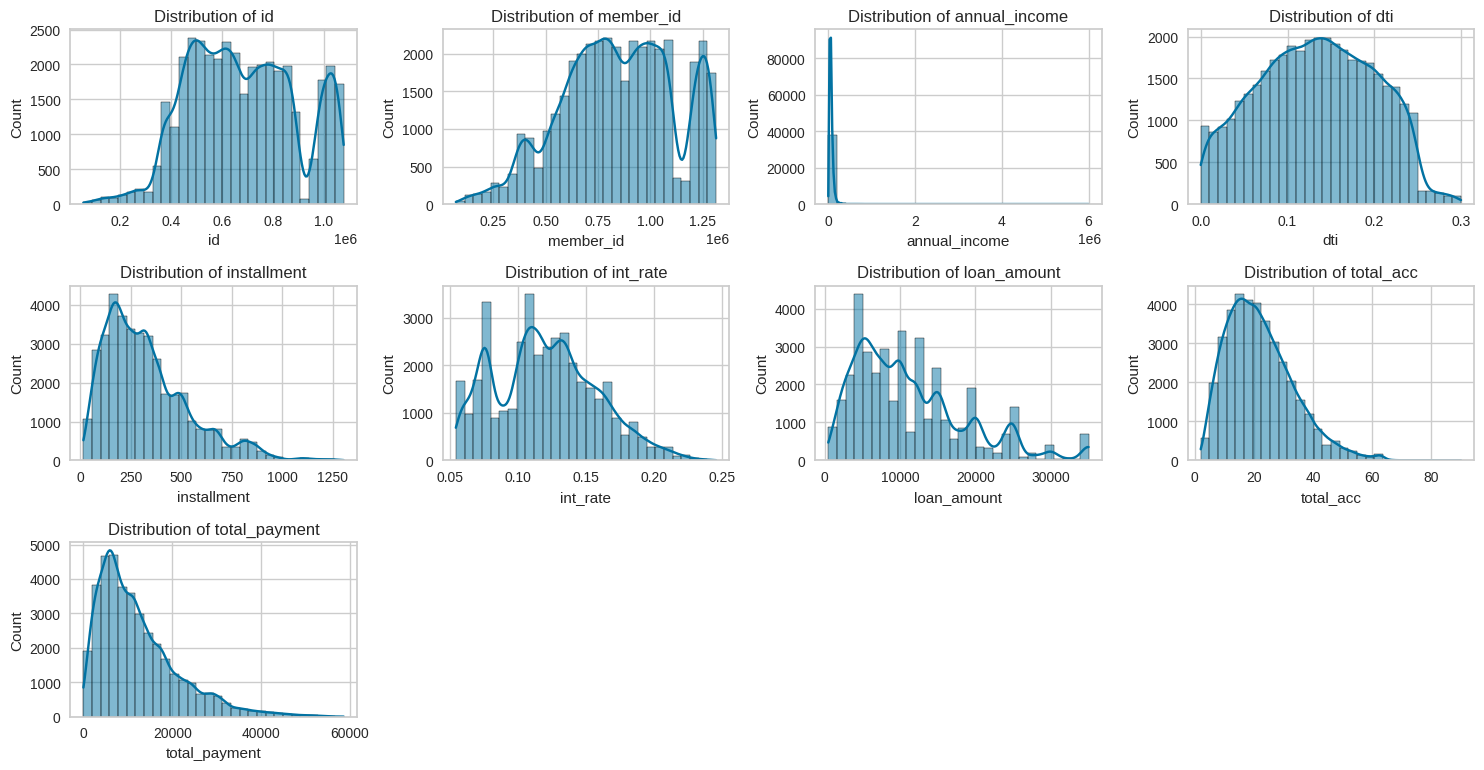

In [ ]:
#Distribusi untuk kolom Numeric melalui visualisasi
#memuat variabel dengan nilai numerik
df_numeric = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_numeric, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

**Kesimpulan :** Pada data numeric, nilai nya memiliki range yang sangat besar supaya range nya lebih seragam pada tahap preprocessing akan dilakukan tahap standarisasi

Jumlah outlier di setiap fitur:
id                  0
member_id           9
annual_income    1824
dti                 0
installment      1150
int_rate           78
loan_amount      1208
total_acc         692
total_payment    1277
dtype: int64


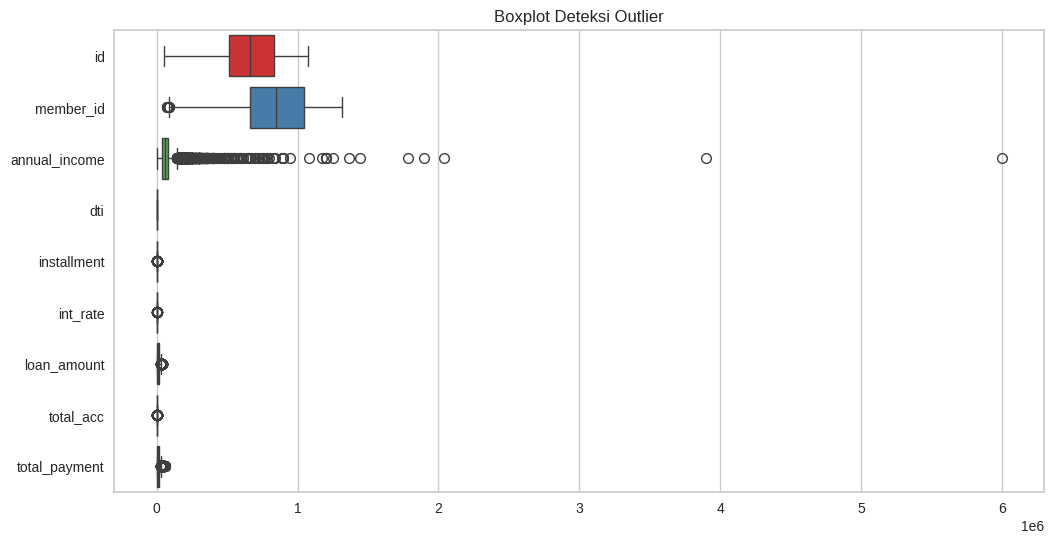

In [ ]:
# Hitung Q1, Q3, dan IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Buat mask Boolean untuk mendeteksi outlier
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)))

# Hitung jumlah outlier per kolom
outlier_counts = outliers.sum()

# Tampilkan jumlah outlier di setiap fitur
print("Jumlah outlier di setiap fitur:")
print(outlier_counts)

# Visualisasi dengan boxplot untuk melihat outlier
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric, orient='h', palette='Set1')
plt.title('Boxplot Deteksi Outlier')
plt.show()

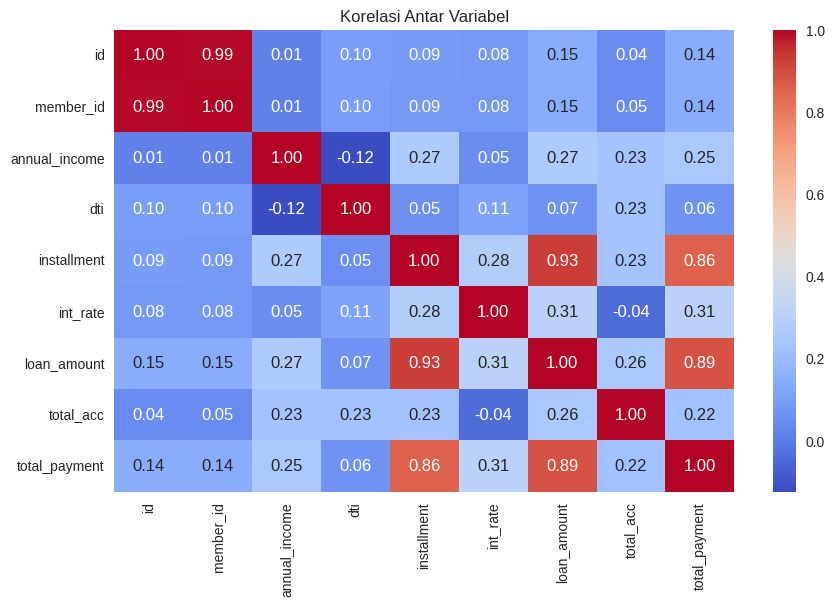

In [ ]:
#Periksa hubungan antara variabel menggunakan matriks korelasi.

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Korelasi Antar Variabel')
plt.show()

**Kesimpulan :** Pada korelasi data numeric diatas terlihat bahwa banyak yang fitur yang memeiliki korelasi yang sangat tinggi, tetapi hal yang perlu kita perhatikan ketika membuat sebuah model, sebaiknya jangan menggunakankan fitur dengan korelasi yang sangat tinggi dan sangat rendah.

In [ ]:
#Melihat informasi data lainnya
df.nunique()

,0
id,38576
address_state,50
application_type,1
emp_length,11
emp_title,28525
grade,7
home_ownership,5
issue_date,65
last_credit_pull_date,107
last_payment_date,102


**Kesimpulan :** Beberapa kolom memiliki nilai uniq yang sedikit oleh karena itu kita bisa membuat visualisasinya dengan mudah, untuk mengetahui informasi mengenai dataset kita

<ipython-input-12-85a40509df28>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['grade'],palette='Set1')


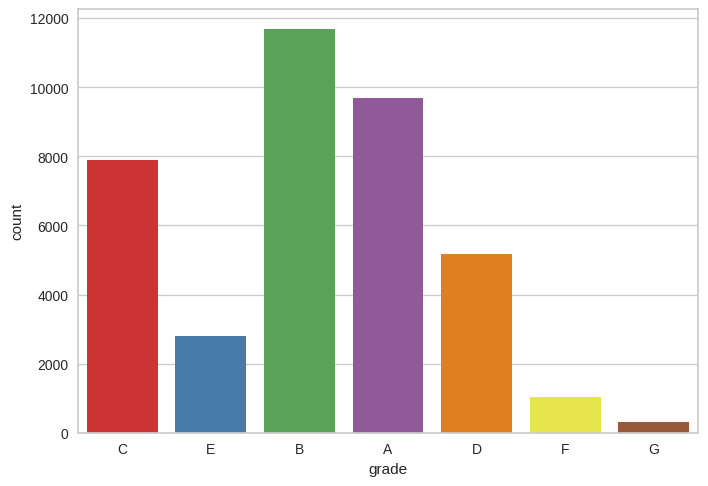

In [ ]:
#visualisasi fitur grade
sns.countplot(x=df['grade'],palette='Set1')
plt.show()

**Kesimpulan :** Sesuai dengan grafik, grade peminjam yang paling banyak berada pada Grade B

<ipython-input-13-dcd12a1a0f1c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['home_ownership'],palette='Set1')


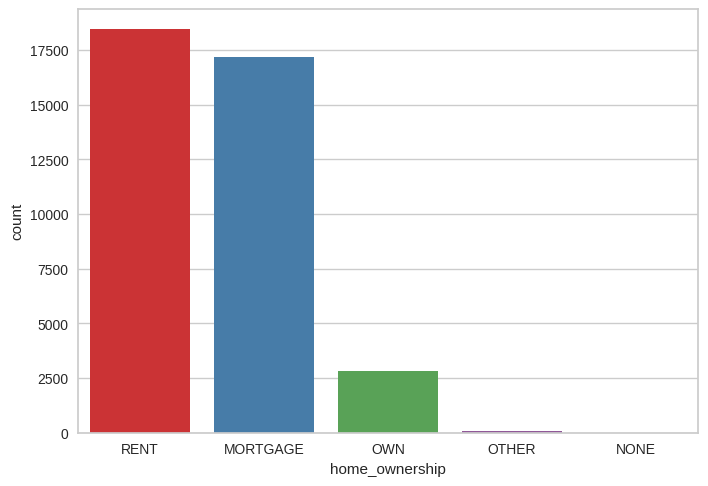

In [ ]:
#visualisasi fitur home ownership
sns.countplot(x=df['home_ownership'],palette='Set1')
plt.show()

**Kesimpulan :** Peminjam yang melalukan pinjaman lebih banyak tinggal secara Rent

<ipython-input-14-3a105ed09efa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['loan_status'],palette='Set1')


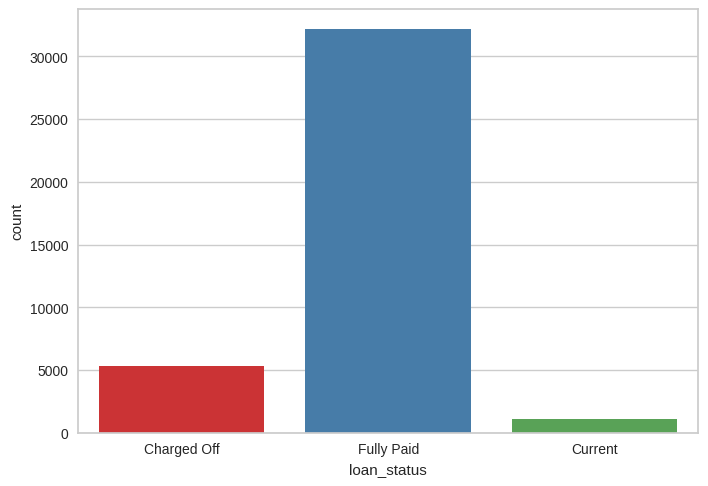

In [ ]:
#visualisasi fitur Loan Status
sns.countplot(x=df['loan_status'],palette='Set1')
plt.show()

**Kesimpulan :** Peminjam sudah banyak melakukan pembayaran lunas

<ipython-input-15-6052dcb36b94>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['term'],palette='Set1')


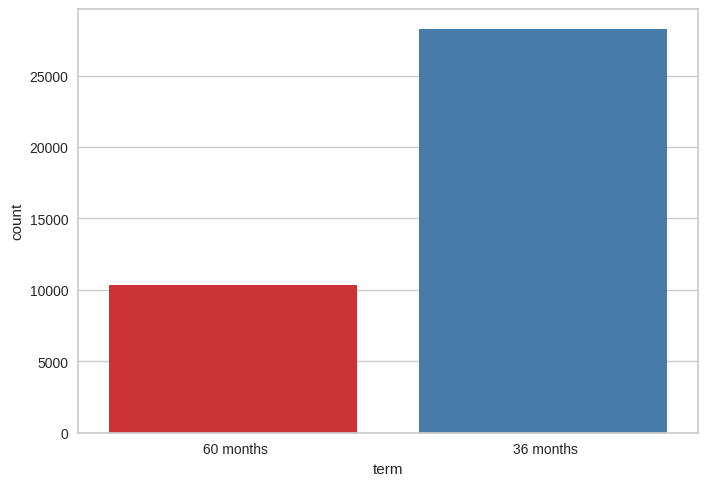

In [ ]:
#visualisasi fitur Term
sns.countplot(x=df['term'],palette='Set1')
plt.show()

**Kesimpulan :** Ketentuan pembayaran dilakukan lebih banyak selama 36 month atau 3 tahun

<ipython-input-16-808f829a8c44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['verification_status'],palette='Set1')


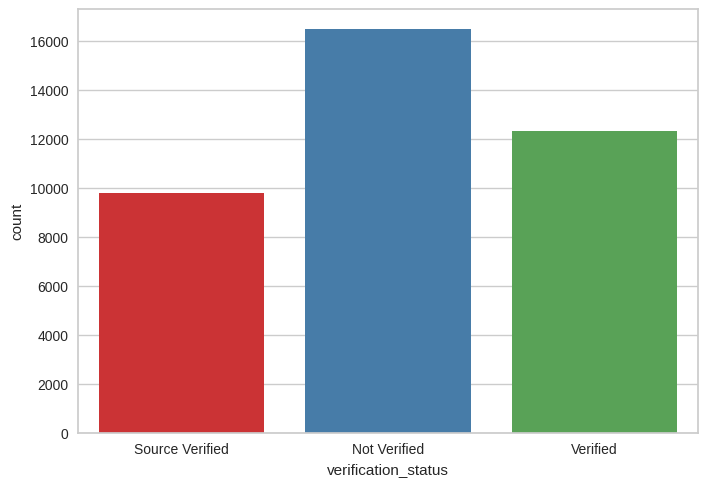

In [ ]:
#visualisasi fitur Verifikasi Status
sns.countplot(x=df['verification_status'],palette='Set1')
plt.show()

**Kesimpulan :** Masih banyak peminjam yang status nya belum ter verifikasi


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
#Menghapus fitur yang tidak dibutuhkan dalam tujuan untuk penialian resiko kredit
#Sebelum melakukan Encoding, terlebih dahulu menghapus fitur datau kolom yang tidak relevan untuk kita analisis
df = df.drop(columns=['id','member_id','last_credit_pull_date','last_payment_date','next_payment_date','issue_date','term','address_state','application_type','emp_length','emp_title','purpose','sub_grade','total_acc','total_payment'])
df.head()

,grade,home_ownership,loan_status,verification_status,annual_income,dti,installment,int_rate,loan_amount
0,C,RENT,Charged Off,Source Verified,30000.0,0.0100,59.83,0.1527,2500
1,E,RENT,Fully Paid,Source Verified,48000.0,0.0535,109.43,0.1864,3000
2,C,RENT,Charged Off,Not Verified,50000.0,0.2088,421.65,0.1596,12000
3,B,MORTGAGE,Fully Paid,Source Verified,42000.0,0.0540,97.06,0.1065,4500
4,A,MORTGAGE,Fully Paid,Verified,83000.0,0.0231,106.53,0.0603,3500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grade                38576 non-null  object 
 1   home_ownership       38576 non-null  object 
 2   loan_status          38576 non-null  object 
 3   verification_status  38576 non-null  object 
 4   annual_income        38576 non-null  float64
 5   dti                  38576 non-null  float64
 6   installment          38576 non-null  float64
 7   int_rate             38576 non-null  float64
 8   loan_amount          38576 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 2.6+ MB


In [ ]:
'''Karena pada dataset terdapat data yang kosong, format data yang kurang tepat, tetapi data tersebut tidak kita gunakan. sehingga kita haanya perlu mencek
fitur yang telah kita pilih saja '''

'Karena pada dataset terdapat data yang kosong, format data yang kurang tepat, tetapi data tersebut tidak kita gunakan. sehingga kita haanya perlu mencek\nfitur yang telah kita pilih saja '

In [ ]:
#Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [ ]:
df_numeric_clean = df_numeric[~outliers.any(axis=1)]
print(f"Jumlah data setelah menghapus outlier: {len(df_numeric_clean)}")

Jumlah data setelah menghapus outlier: 34466


In [ ]:
#melakukan Standarisasi pada data numerik dan menyimpan pada dataset df
scaler = StandardScaler()
df_numeric_clean = df.select_dtypes(include=['int64','float64'])
df_standardized = scaler.fit_transform(df_numeric_clean)
df_standardized = pd.DataFrame(df_standardized, columns=df_numeric_clean.columns)
df_standardized.describe()

,annual_income,dti,installment,int_rate,loan_amount
count,3.857400e+04,3.857400e+04,3.857400e+04,3.857400e+04,3.857400e+04
mean,1.886234e-16,-8.252272e-17,-3.035657e-16,-2.063068e-16,5.010308e-17
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.020989e+00,-1.999387e+00,-1.488266e+00,-1.783763e+00,-1.447076e+00
25%,-4.377237e-01,-7.677510e-01,-7.576334e-01,-7.343336e-01,-7.768790e-01
50%,-1.499794e-01,1.383521e-02,-2.095397e-01,-5.085934e-02,-1.737017e-01
75%,2.108675e-01,7.894208e-01,5.143726e-01,6.837409e-01,4.964952e-01
max,9.223926e+01,2.499610e+00,4.679254e+00,3.374584e+00,3.177283e+00


In [ ]:
#Memeriksa nilai kosong
df_standardized.isnull().sum()

,0
annual_income,0
dti,0
installment,0
int_rate,0
loan_amount,0


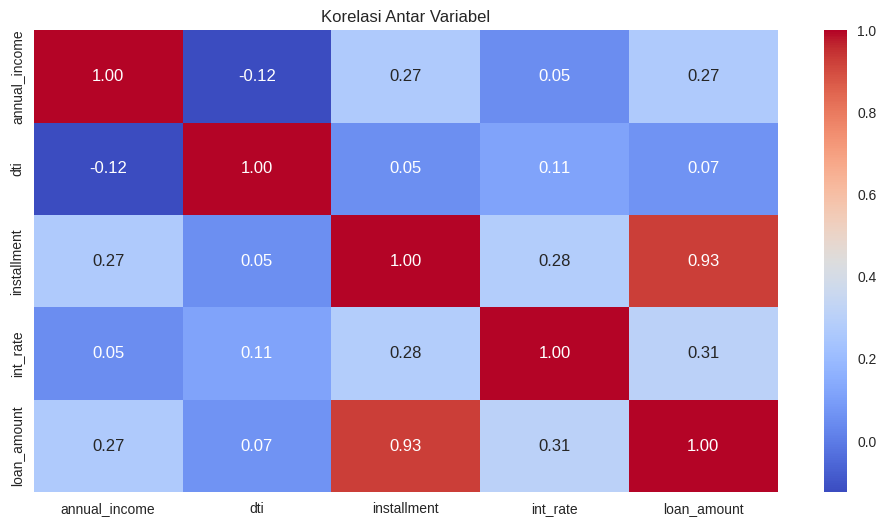

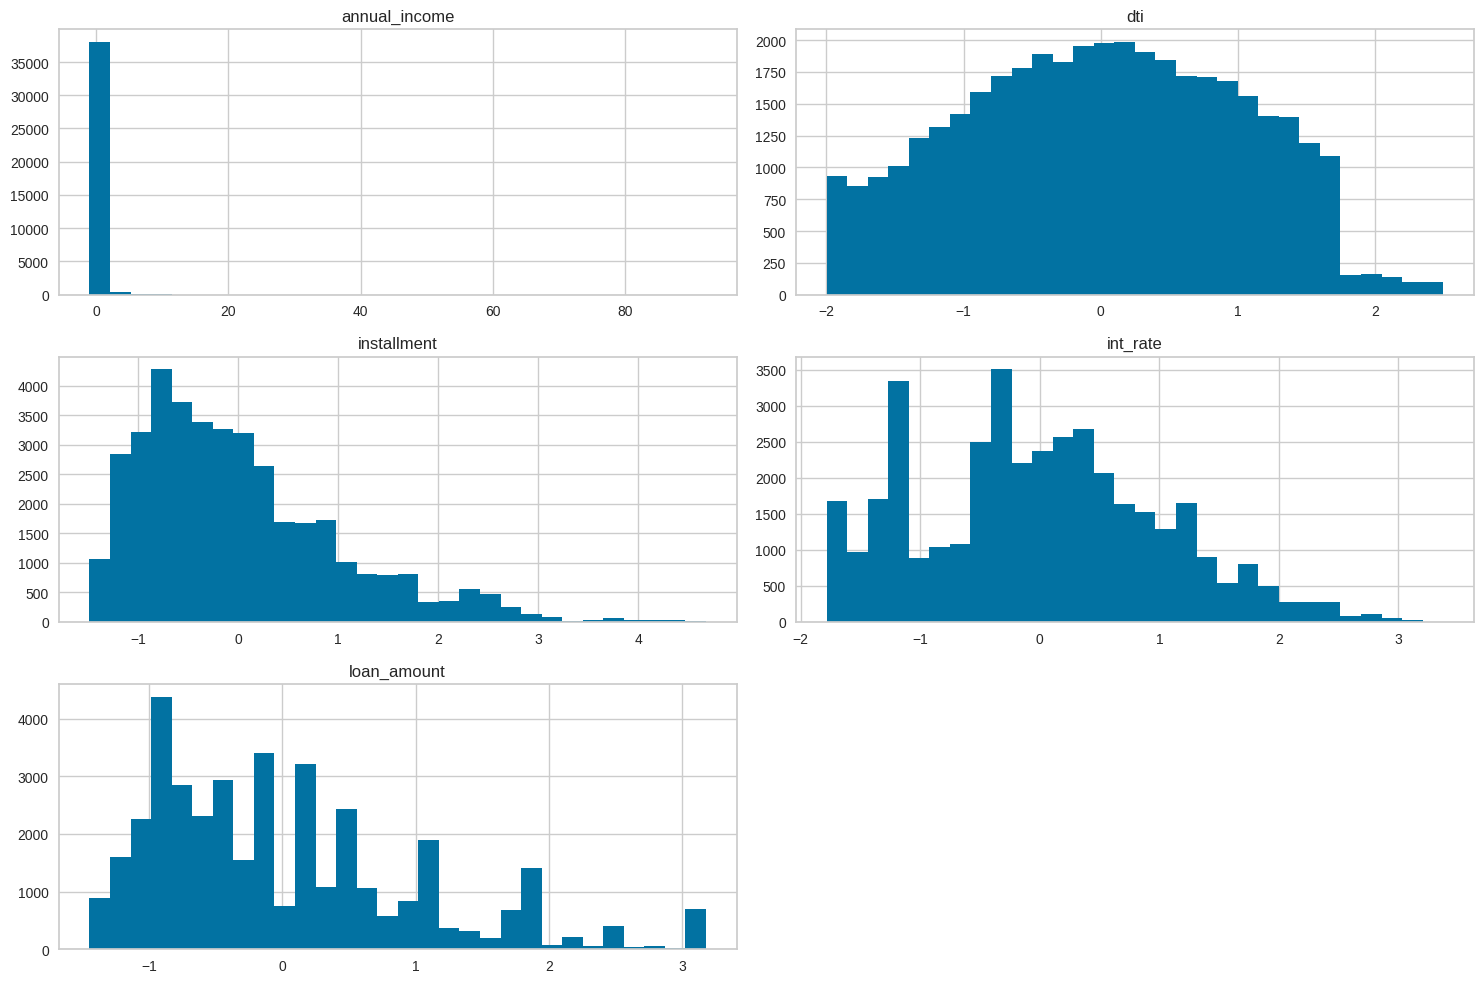

In [ ]:
#Histogram setelah standarisasi
plt.figure(figsize=(12, 6))
sns.heatmap(df_standardized.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Korelasi Antar Variabel')
plt.show()

#Korelasi setelah standarisasi pada data numeric
df_standardized.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


**Kesimpulan :**
Outlier yang terlihat melalui boxplot tidak perlu kita tangani, karena annual income bisa saja tinggi dan rendah begitupun dengan installment para peminjam dan loan amountnya

In [ ]:
# Encoding kategori
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['grade', 'home_ownership', 'loan_status', 'verification_status']

encoders = {}
df_categorical = df[categorical_columns].copy()

for col in categorical_columns:
    encoders[col] = LabelEncoder()
    df_categorical[col] = encoders[col].fit_transform(df[col])


df_categorical.head()


,grade,home_ownership,loan_status,verification_status
0,2,4,0,1
1,4,4,2,1
2,2,4,0,0
3,1,0,2,1
4,0,0,2,2


In [ ]:
#Menggabungkan df_standarisasi dengan hasil encoding
df = pd.concat([df_standardized, df_categorical], axis=1)

# Simpan hasil akhir
df.head()


,annual_income,dti,installment,int_rate,loan_amount,grade,home_ownership,loan_status,verification_status
0,-0.616592,-1.849370,-1.277150,0.866718,-1.178997,2.0,4.0,0.0,1.0
1,-0.336624,-1.196798,-1.039919,1.773533,-1.111977,4.0,4.0,2.0,1.0
2,-0.305517,1.132959,0.453391,1.052386,0.094377,2.0,4.0,0.0,0.0
3,-0.429947,-1.189298,-1.099083,-0.376451,-0.910918,1.0,0.0,2.0,1.0
4,0.207757,-1.652849,-1.053789,-1.619621,-1.044958,0.0,0.0,2.0,2.0


In [ ]:
#Mencek apakah ketika dilakukan encoding ada nilai kosong
df.isnull().sum()

,0
annual_income,2
dti,2
installment,2
int_rate,2
loan_amount,2
grade,2
home_ownership,2
loan_status,2
verification_status,2


In [ ]:
#Mengatasi outlier pada data dengan menghapus nilai kosong
df.dropna(inplace=True)

In [ ]:
#melihat deskripsi semua fitur
df.describe()

,annual_income,dti,installment,int_rate,loan_amount,grade,home_ownership,loan_status,verification_status
count,3.857200e+04,38572.000000,38572.000000,38572.000000,38572.000000,38572.000000,38572.000000,38572.000000,38572.000000
mean,-2.881908e-07,0.000029,0.000030,0.000046,0.000033,1.586151,2.137768,1.695064,0.892902
std,1.000034e+00,1.000030,1.000029,1.000014,1.000027,1.388803,1.936509,0.698917,0.857365
min,-1.020989e+00,-1.999387,-1.488266,-1.783763,-1.447076,0.000000,0.000000,0.000000,0.000000
25%,-4.377392e-01,-0.767751,-0.757633,-0.734334,-0.776879,0.000000,0.000000,2.000000,0.000000
50%,-1.499794e-01,0.013835,-0.209516,-0.050859,-0.173702,1.000000,3.000000,2.000000,1.000000
75%,2.108675e-01,0.789421,0.514576,0.683741,0.496495,2.000000,4.000000,2.000000,2.000000
max,9.223926e+01,2.499610,4.679254,3.374584,3.177283,6.000000,4.000000,2.000000,2.000000


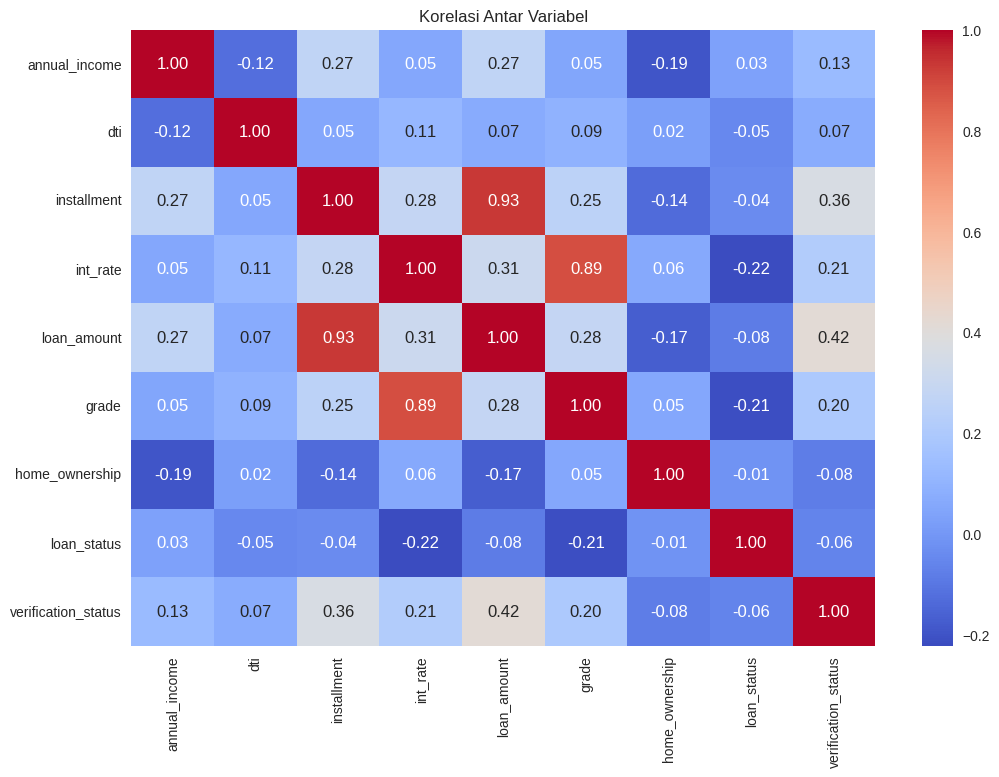

In [ ]:
#menampilkan korelasi semua fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Korelasi Antar Variabel')
plt.show()

In [ ]:
#Pengelompokan Data
x_finan = df[['annual_income', 'dti', 'installment', 'loan_amount']] #Pengelompokan Data berdasarkan kondisi keuangan peminjam
x_risk = df[['grade', 'int_rate', 'loan_status']] #Pengelompokkan data berdasarkan resiko pinjaman
x_aset =df[['home_ownership','verification_status']] #Pengelompokkan data berdasarkan aset peminjam

In [ ]:
#menampilkan fitur x_finan
x_finan.head()

,annual_income,dti,installment,loan_amount
0,-0.616592,-1.849370,-1.277150,-1.178997
1,-0.336624,-1.196798,-1.039919,-1.111977
2,-0.305517,1.132959,0.453391,0.094377
3,-0.429947,-1.189298,-1.099083,-0.910918
4,0.207757,-1.652849,-1.053789,-1.044958


In [ ]:
#menampilkan fitur x_risk
x_risk.head()

,grade,int_rate,loan_status
0,2.0,0.866718,0.0
1,4.0,1.773533,2.0
2,2.0,1.052386,0.0
3,1.0,-0.376451,2.0
4,0.0,-1.619621,2.0


In [ ]:
#menampilkan fitur x_aset
x_aset.head()

,home_ownership,verification_status
0,4.0,1.0
1,4.0,1.0
2,4.0,0.0
3,0.0,1.0
4,0.0,2.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Model yang digunakan adalah model algoritma KMeans
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

In [ ]:
# Menentukan jumlah cluster optimal, misalnya 7
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)

# Melatih model dan mendapatkan label cluster
labels = kmeans.fit_predict(df)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

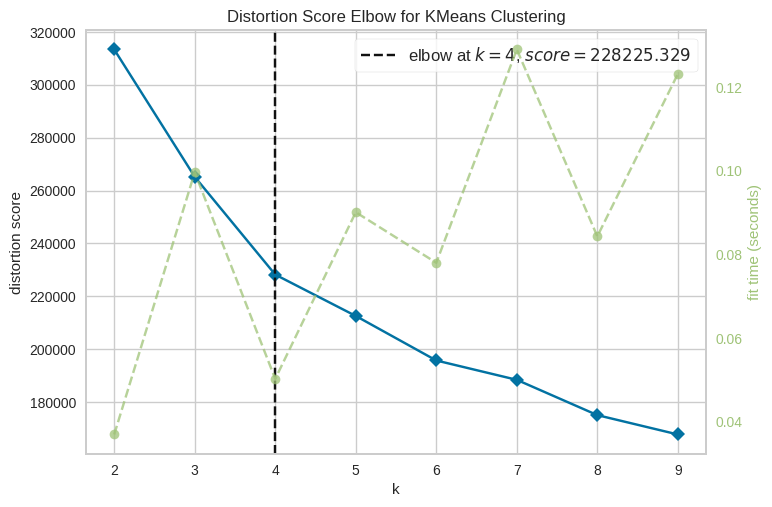

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Cari jumlah cluster optimal setelah PCA
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df)
visualizer.show()

In [ ]:
# Tentukan jumlah cluster optimal dari hasil Elbow Method
optimal_clusters = 4  # Sesuaikan dengan hasil dari elbow

# Inisialisasi dan latih model KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df)

# Hitung Silhouette Score
sil_score = silhouette_score(df, cluster_labels)
print(f"Silhouette Score untuk {optimal_clusters} cluster: {sil_score:.2f}")

Silhouette Score untuk 4 cluster: 0.26


**Kesimpulan :**
Karena silhoute score pada cluster diatas masih rendah atau < 0.7 maka kita akan melakukan feature selection


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Memilih fitur
X = df[['home_ownership','annual_income','dti','loan_status']]

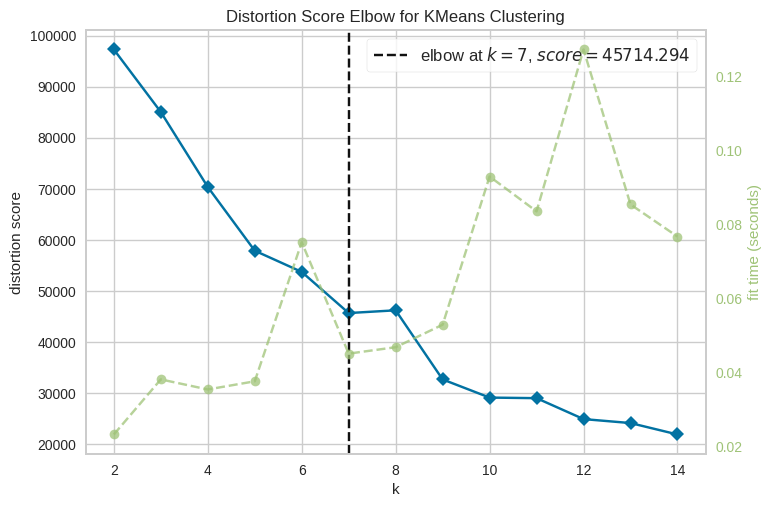

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Cari jumlah cluster optimal setelah PCA
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 15))
visualizer.fit(X)
visualizer.show()

In [ ]:
# Tentukan jumlah cluster optimal dari hasil Elbow Method
optimal_clusters = 6  # Sesuaikan dengan hasil dari elbow

# Inisialisasi dan latih model KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Hitung Silhouette Score
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score untuk {optimal_clusters} cluster: {sil_score:.2f}")

Silhouette Score untuk 6 cluster: 0.35


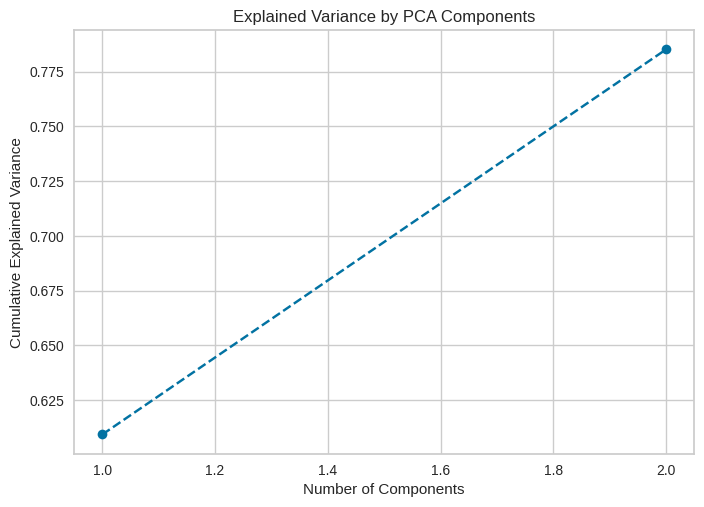

In [ ]:
#Karena setelah pemilihan fitur silhouette nya masih rendah maka, kita menggunakan PCA
from sklearn.decomposition import PCA

# Mengurangi dimensi ke 2 atau 3 untuk clustering yang lebih stabil
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi varians PCA
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

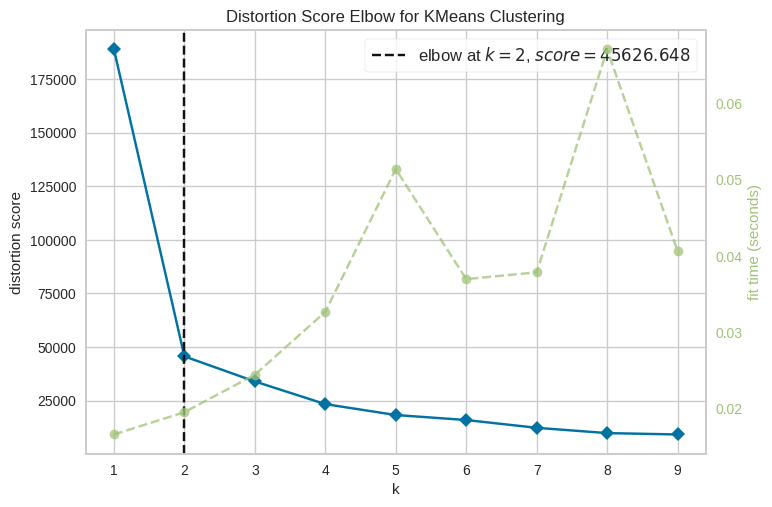

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Cari jumlah cluster optimal setelah PCA
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(X_pca)
visualizer.show()

In [ ]:
# Gunakan jumlah cluster optimal dari elbow method
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
new_labels = kmeans.fit_predict(X_pca)

# Hitung Silhouette Score
sil_score = silhouette_score(X_pca, new_labels)
print(f"Silhouette Score setelah PCA: {sil_score:.2f}")

Silhouette Score setelah PCA: 0.72


In [ ]:
# Menambahkan hasil cluster ke DataFrame asli
df['Cluster'] = new_labels

# Menampilkan beberapa baris pertama dataset setelah ditambahkan cluster
print(df.head())

   annual_income       dti  installment  int_rate  loan_amount  grade  \
0      -0.616592 -1.849370    -1.277150  0.866718    -1.178997    2.0   
1      -0.336624 -1.196798    -1.039919  1.773533    -1.111977    4.0   
2      -0.305517  1.132959     0.453391  1.052386     0.094377    2.0   
3      -0.429947 -1.189298    -1.099083 -0.376451    -0.910918    1.0   
4       0.207757 -1.652849    -1.053789 -1.619621    -1.044958    0.0   

   home_ownership  loan_status  verification_status  Cluster  
0             4.0          0.0                  1.0        0  
1             4.0          2.0                  1.0        0  
2             4.0          0.0                  0.0        0  
3             0.0          2.0                  1.0        1  
4             0.0          2.0                  2.0        1  


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

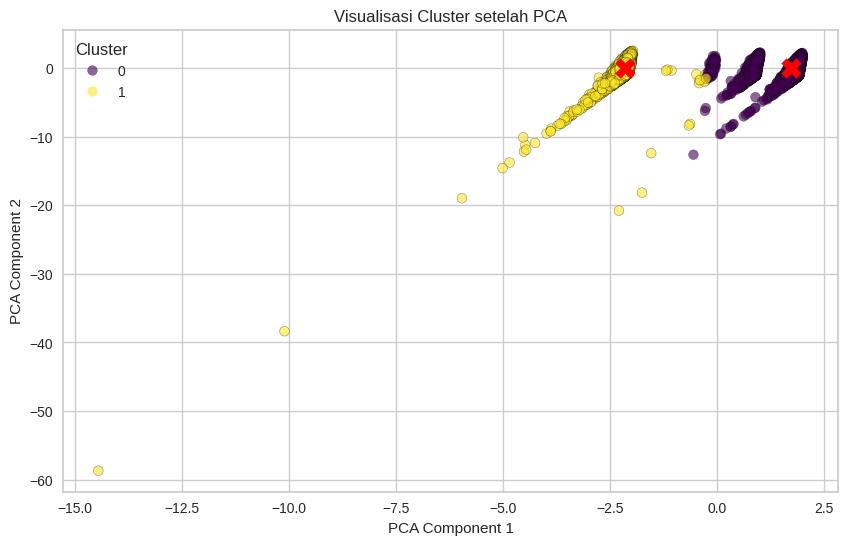

In [ ]:
# Plot hasil clustering dengan PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=new_labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')

# Tambahkan label dan legend
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisasi Cluster setelah PCA')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()

**Kesimpulan :** Terdapat 2 cluster dengan silhouette score nya 0.72

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
#Menambahkan hasil label cluster kedalam DataFrame
df['Cluster'] = new_labels
df.head()

,annual_income,dti,installment,int_rate,loan_amount,grade,home_ownership,loan_status,verification_status,Cluster
0,-0.616592,-1.849370,-1.277150,0.866718,-1.178997,2.0,4.0,0.0,1.0,0
1,-0.336624,-1.196798,-1.039919,1.773533,-1.111977,4.0,4.0,2.0,1.0,0
2,-0.305517,1.132959,0.453391,1.052386,0.094377,2.0,4.0,0.0,0.0,0
3,-0.429947,-1.189298,-1.099083,-0.376451,-0.910918,1.0,0.0,2.0,1.0,1
4,0.207757,-1.652849,-1.053789,-1.619621,-1.044958,0.0,0.0,2.0,2.0,1


In [ ]:
# Mendownload df yang telah dinormalisasi dan diberi label untuk dilanjutkan ke proses Klasifikasi
from google.colab import files

df.to_csv('CreditRisk_clustering.csv',index=False)
files.download('CreditRisk_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#MEngembalikan nilai numeric ke bentuk semula
df_original_numerical = pd.DataFrame(scaler.inverse_transform(df_standardized), columns=df_numeric_clean.columns)

In [ ]:
#Mengembalikan nilai kategorikal ke bentuk semula
df_original_categorical = df_categorical.copy()

for col in categorical_columns:
    df_original_categorical[col] = encoders[col].inverse_transform(df_categorical[col])


In [ ]:
#Menggabungkan kolom dan menambah cluster
df_original = pd.concat([df_original_numerical, df_original_categorical], axis=1)
df_original['Cluster']=df['Cluster']
df_original.head()

,annual_income,dti,installment,int_rate,loan_amount,grade,home_ownership,loan_status,verification_status,Cluster
0,30000.0,0.0100,59.83,0.1527,2500.0,C,RENT,Charged Off,Source Verified,0.0
1,48000.0,0.0535,109.43,0.1864,3000.0,E,RENT,Fully Paid,Source Verified,0.0
2,50000.0,0.2088,421.65,0.1596,12000.0,C,RENT,Charged Off,Not Verified,0.0
3,42000.0,0.0540,97.06,0.1065,4500.0,B,MORTGAGE,Fully Paid,Source Verified,1.0
4,83000.0,0.0231,106.53,0.0603,3500.0,A,MORTGAGE,Fully Paid,Verified,1.0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
#download csv hasil invers
df_original.to_csv('df_Creditrisk_clustering.csv',index=False)
files.download('df_Creditrisk_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Jumlah data dalam setiap cluster:
Cluster
0.0    21358
1.0    17214
Name: count, dtype: int64

Statistik deskriptif tiap cluster:
        annual_income                                                        \
                count          mean           std     min      25%      50%   
Cluster                                                                       
0.0           21358.0  58159.383455  39356.804673  4000.0  36000.0  50000.0   
1.0           17214.0  83890.302961  83515.074955  8400.0  51996.0  70800.0   

                                 dti            ... int_rate          \
             75%        max    count      mean  ...      75%     max   
Cluster                                         ...                    
0.0      70000.0  1200000.0  21358.0  0.134741  ...   0.1465  0.2440   
1.0      99000.0  6000000.0  17214.0  0.131467  ...   0.1427  0.2459   

        loan_amount                                                     \
              count          mean      

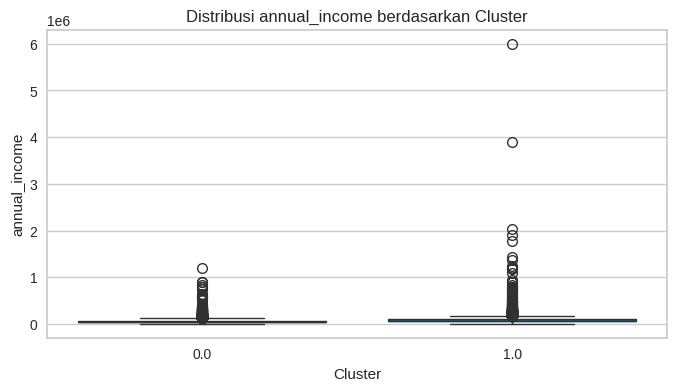

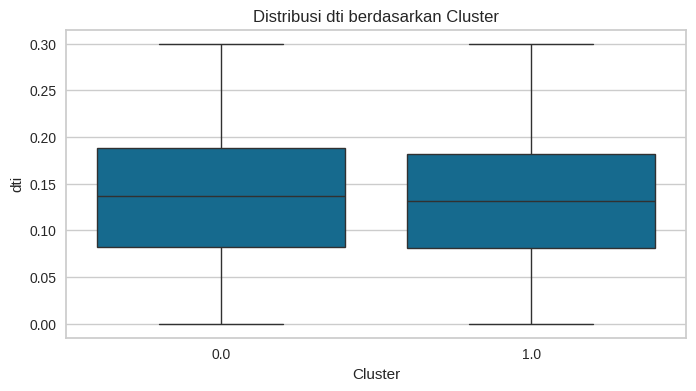

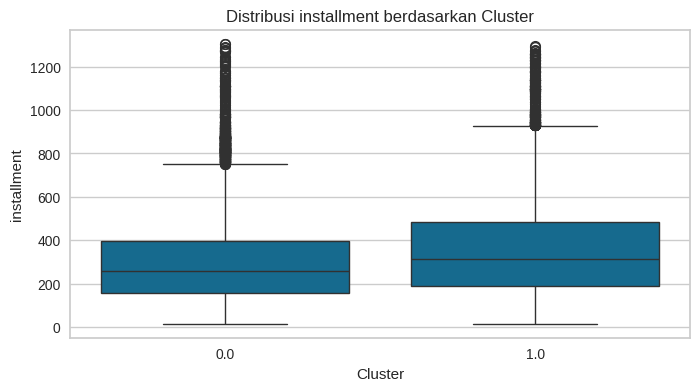

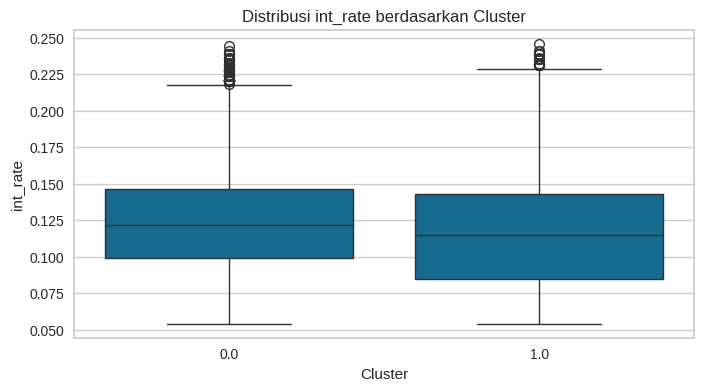

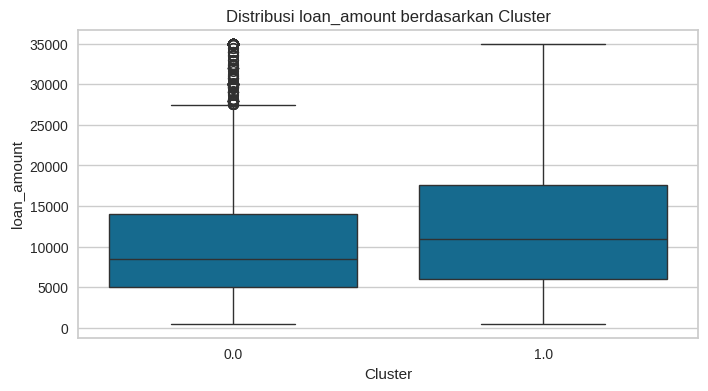

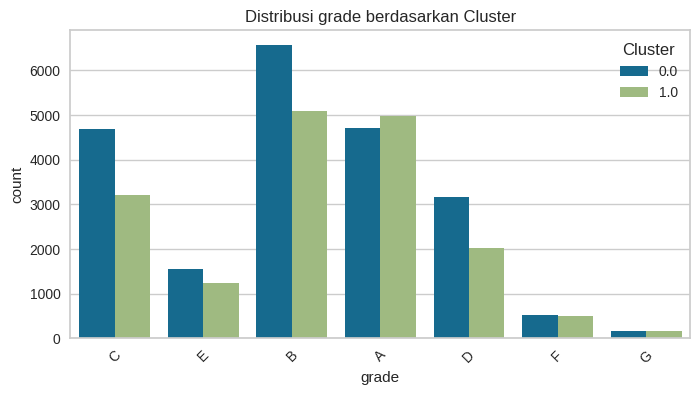

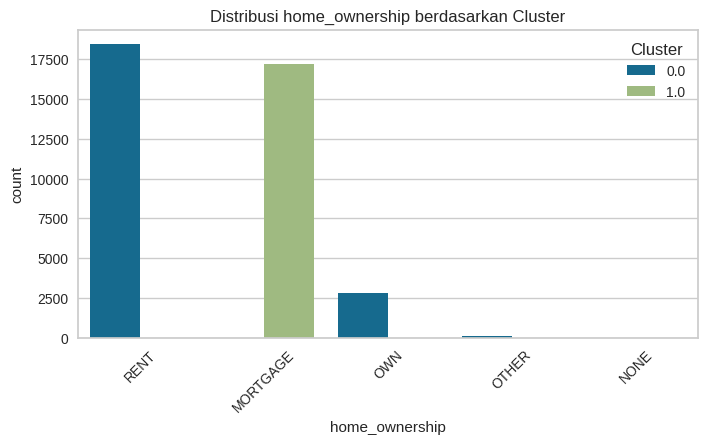

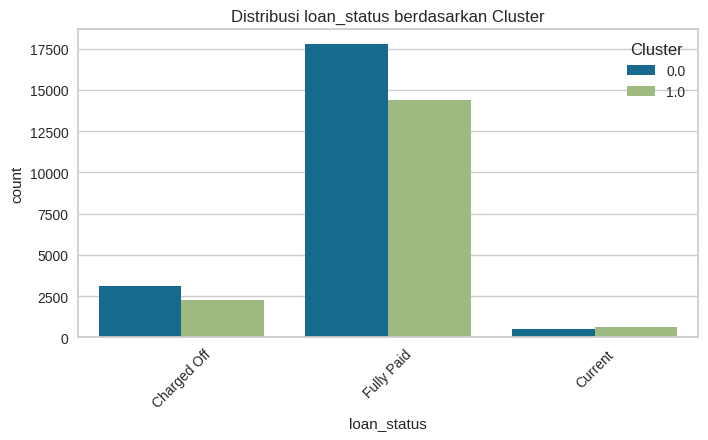

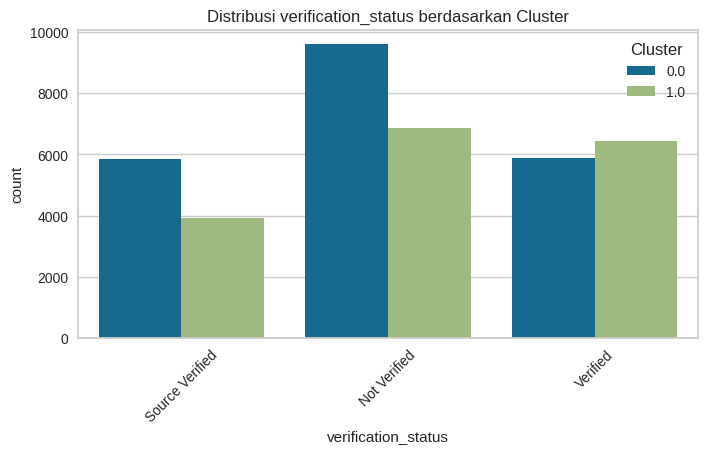


Interpretasi awal berdasarkan hasil clustering:
Cluster 0:
  - Rata-rata annual income: 58,159.38
  - Rata-rata int_rate: 0.12%
  - Proporsi loan_status charged off: 14.51%

Cluster 1:
  - Rata-rata annual income: 83,890.30
  - Rata-rata int_rate: 0.12%
  - Proporsi loan_status charged off: 12.98%

Kesimpulan:
- Jika Cluster 0 memiliki pendapatan lebih rendah dan tingkat bunga lebih tinggi, mereka mungkin lebih berisiko.
- Jika Cluster 1 memiliki pendapatan lebih tinggi dan proporsi gagal bayar lebih rendah, mereka adalah peminjam yang lebih aman.


In [ ]:
# Load dataset (gantilah 'your_data.csv' dengan nama file yang sesuai)
df = pd.read_csv('df_Creditrisk_clustering.csv')

# Menampilkan jumlah anggota dalam setiap cluster
print("Jumlah data dalam setiap cluster:")
print(df['Cluster'].value_counts())

# Statistik deskriptif tiap cluster
print("\nStatistik deskriptif tiap cluster:")
print(df.groupby('Cluster').describe())

# Visualisasi distribusi fitur numerik berdasarkan cluster
numeric_features = ['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount']
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribusi {feature} berdasarkan Cluster')
    plt.show()

# Analisis kategori fitur non-numerik
def plot_categorical_distribution(feature):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='Cluster', data=df)
    plt.title(f'Distribusi {feature} berdasarkan Cluster')
    plt.xticks(rotation=45)
    plt.show()

categorical_features = ['grade', 'home_ownership', 'loan_status', 'verification_status']
for feature in categorical_features:
    plot_categorical_distribution(feature)

# Interpretasi awal terkait credit risk
print("\nInterpretasi awal berdasarkan hasil clustering:")
if df['Cluster'].nunique() == 2:
    cluster_0 = df[df['Cluster'] == 0]
    cluster_1 = df[df['Cluster'] == 1]

    print("Cluster 0:")
    print(f"  - Rata-rata annual income: {cluster_0['annual_income'].mean():,.2f}")
    print(f"  - Rata-rata int_rate: {cluster_0['int_rate'].mean():.2f}%")
    print(f"  - Proporsi loan_status charged off: {(cluster_0['loan_status'] == 'Charged Off').mean():.2%}")

    print("\nCluster 1:")
    print(f"  - Rata-rata annual income: {cluster_1['annual_income'].mean():,.2f}")
    print(f"  - Rata-rata int_rate: {cluster_1['int_rate'].mean():.2f}%")
    print(f"  - Proporsi loan_status charged off: {(cluster_1['loan_status'] == 'Charged Off').mean():.2%}")

    print("\nKesimpulan:")
    print("- Jika Cluster 0 memiliki pendapatan lebih rendah dan tingkat bunga lebih tinggi, mereka mungkin lebih berisiko.")
    print("- Jika Cluster 1 memiliki pendapatan lebih tinggi dan proporsi gagal bayar lebih rendah, mereka adalah peminjam yang lebih aman.")
else:
    print("Lebih dari dua cluster ditemukan, silakan lakukan analisis lebih lanjut.")


Tulis hasil interpretasinya di sini.
1. Cluster 0:
  - Rata-rata annual income: 58,159.38
  - Rata-rata int_rate: 0.12%
  - Proporsi loan_status charged off: 14.51%

2. Cluster 1:
  - Rata-rata annual income: 83,890.30
  - Rata-rata int_rate: 0.12%
  - Proporsi loan_status charged off: 12.98%
3. Kesimpulan:
- Jika Cluster 0 memiliki pendapatan lebih rendah dan tingkat bunga lebih tinggi, mereka mungkin lebih berisiko.
- Jika Cluster 1 memiliki pendapatan lebih tinggi dan proporsi gagal bayar lebih rendah, mereka adalah peminjam yang lebih aman.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
'''Telah melakukan download file CSV sebelum bagian anlisis, karena saya menggunakkan
dataset yang sudah di invers dan sudah memiliki cluster'''

'Telah melakukan download file CSV sebelum bagian anlisis, karena saya menggunakkan\ndataset yang sudah di invers dan sudah memiliki cluster'